# 3.6 Lab - Linear Regression

## 3.6.1 Importing Packages

We start by importing the needed standard libraries at the top level.

In [37]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

#### Inspecting Objects and Namespaces

The function `dir()` provides a list of objects in a namespace.

In [38]:
dir()

['A',
 'Boston',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 '_',
 '_10',
 '_12',
 '_13',
 '_15',
 '_18',
 '_20',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_29',
 '_3',
 '_30',
 '_32',
 '_4',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'abline',
 'anova_lm',
 'ax',
 'design',
 'exit',
 'get_ipython',
 'load_data',
 'model',
 'newX',
 'new_df',
 'new_predictions',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'results',
 'sm',
 'subplots',
 'summarize',
 'y']

This shows everything that `Python` can find at the top level. There are certain objects like `__builtins__` that contain references to built-in functions like `print()`.

Every Python object has its own notion of namespace, also accessible with `dir()`. This will include the attributes of the object as well as any methods associated with it. For example, we can see `sum` in the listing for an array.

In [39]:
A = np.array([3, 5, 11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


This indicates that the object `A.sum` exists. IT is a method that can be used to compute the sum of the array `A` as seen typing `A.sum?`.

In [40]:
A.sum?

Docstring:
a.sum(axis=None, dtype=None, out=None, keepdims=False, initial=0, where=True)

Return the sum of the array elements over the given axis.

Refer to `numpy.sum` for full documentation.

See Also
--------
numpy.sum : equivalent function
Type:      builtin_function_or_method

In [41]:
A.sum()

np.int64(19)

## 3.6.2 Simple Linear Regression

In this section we will construct **model matrices** (or **design matrices**) using the `ModelSpec()` transform from `ISLP.models`. We will use the `Boston` dataset (see 2.4 Exercises for full details on the Boston dataset).

The Python model `statsmodel` contains functions implementing several commonly used regression methods. The `load_data()` function in the `ISLP` package loads in the data for us automatically.

In [42]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We start by using the `sm.OLS()` function to fit a simple linear regression model. The response will be `medv` and `lstat` will be the single predictor. For this model, we can create the model matrix by hand.

In [43]:
# Establish the intercept value and extract the lstat predictor
X = pd.DataFrame({'intercept' : np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Next, we extract the response and fit the model.

In [44]:
y = Boston['medv']      # Extract the response
model = sm.OLS(y, X)    # Initiate the model
results = model.fit()   # Fit the model

The `ISLP` function `summarize()` produces a simple table of the parameter estimates, their standard errors, t-statistics, and p-values. It takes in a single argument, namely the `results` returned from the `fit` method above.

In [45]:
# Summarize the results
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Next we outline a more useful and general framework for constructing a model matrix `X`.

#### Using Transformations: Fit and Transform

The `sklearn` Python package has **transforms**, which are objects that is created to handle datasets to be used in a predictive model. It consists of an object that is created via some parameters passed in as arguments. There are two main methods to this object: `fit()` and `transform()`. 

The transform `ModelSpec()` in the `ISLP` package does some transforms for us in the background, and may perform some data preprocessing before fitting the model. We'll first do an example regressing onto `lstat`. 

In [46]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Note in this simple case for simple linear regression, `fit()` merely confirms that `lstat` is within the `Boston` dataset. Then `trasnform()` constructs the model matrix with two columns: an `intercept` and the variable `lstat`.

We can combine these steps with the `fit_transform()` method.

In [47]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Returning to our fitted regression model, the object `results` has several methods that can be used for inference. For a full and somewhat exhaustive summary of the fit, we can use the `summary()` method.

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           5.08e-88
Time:                        13:18:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can be retrieved using the `params` attribute of `results`.

In [49]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

The `get_predictions()` method can be used to obtain predictions and produce confidence intervals and prediction intervals for the prediction of `medv` for given values of `lstat`.

First we create a new dataframe containing only the variable `lstat`, and the values for this variable at which we want to make predictions. Then we use `transform()` method of `design` to create the corresponding model matrix.

In [50]:
new_df = pd.DataFrame({'lstat' : [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Next we compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [51]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

We can also product confidence  (i.e., intervals around the true value of $f(x_i)$ for each of our $x_i$ where $f$ is the true model for $y = f(X) + \epsilon$) for the predicted values.

In [52]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

To get prediction intervals (i.e., intervals around the true value of $y$ where $y = f(X) + \epsilon$) we set `obs=True`. Note that these are larger than the confidence intervals, accounting for the error term $\epsilon$.

In [53]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

The next task is to plot `medv` and `lstat` using `DataFrame.plot.scatter()`, and add the regression line to the resulting plot.

#### Defining Functions

Here's an example of defining a function that adds a line to an existing plot.

In [54]:
def abline(ax, b, m):
    "Add a line with slome m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

We can modify the above function to allow for adding in optional arguments to be passed to the `ax.plot` function as follows:

In [55]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slome m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

Note that `*args` allows us to pass in any number of non-named arguments, and `**kwargs` any number of named arguments. We'll use the function to add the regression line to a plot of `medv` vs. `lstat`.

C:\Users\JustinG\AppData\Local\Temp\ipykernel_30020\1198889689.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\JustinG\AppData\Local\Temp\ipykernel_30020\1198889689.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


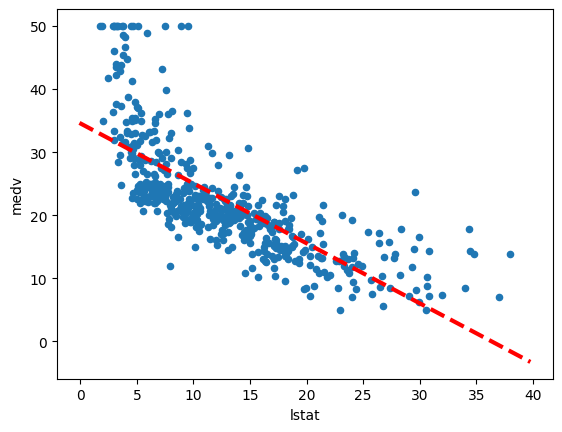

In [57]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

Note that there is an existing function to add a line to a plot (`ax.axline()`) but knowing how to write our own functions is important.

Next we examing som diagnostic plots, such as the fitted values, residuals, and influences measures. We can compute them with the `get_influence()` method. We will not use the `fig` component returned as the first value from `subplots()`, so we can capture the second returned value using indexing.

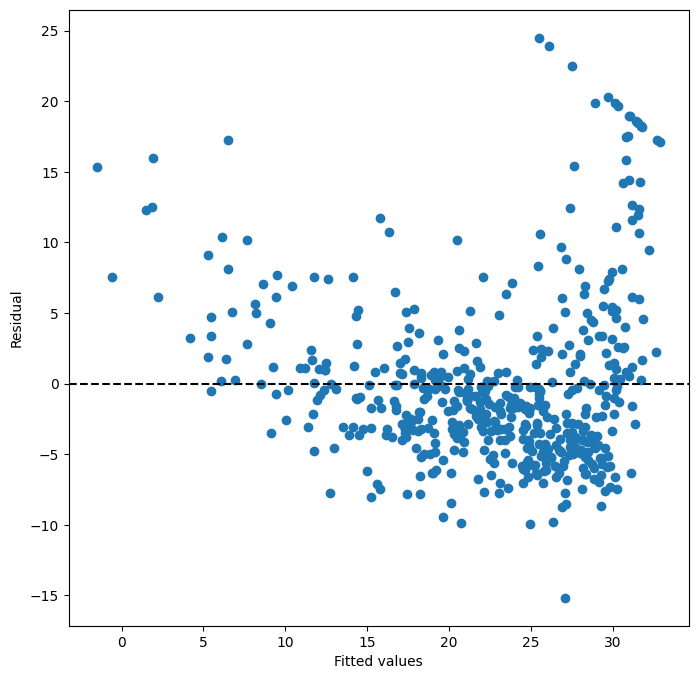

In [58]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

We can see from the above plot that there is some strong evidence of non-linearity due to the spread of the residuals. 

Leverage statistics can be computed for any number of predictors using the `hat_matrix_diag` attribute of the value returned by the `get_influence()` method.

np.int64(374)

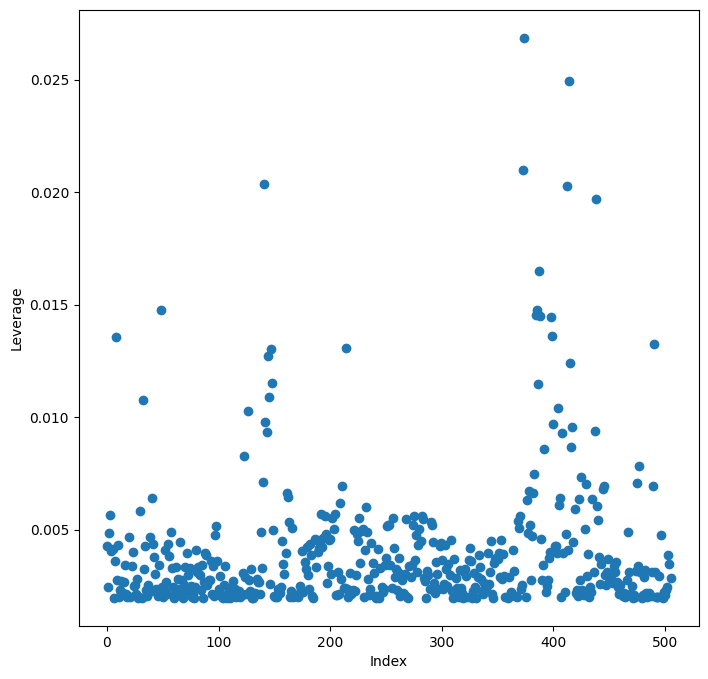

In [61]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

The `np.argmax()` function identifies the index of the largest element of an array, optionally computed over an axis of the array. In this case, we maximized over the entire array to determine which observation has the largest leverage statistic.

Recall that **leverage** refers to the influence caused by an unusual value of $x_i$, i.e. the input or fitted value. From the above graph we can see that there are several $x_i$'s with high leverage.

## 3.6.3 Multiple Linear Regression

To fit a multiple linear regression model using least squares, we again use the `ModelSpec()` transform to construct the required model matrix and response. While the inputs to `ModelSpec()` can be quite general, in this case a list of column names suffices. We perform a fit with the two variables `lstat` and `age`.

In [63]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


The Boston dataset contains 12 variables, and it would be cumbersome to type all of them. Instead, we can drop the column we are regressing and select all the remaining columns with the following short-hand:

In [64]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

Now we fit the model with the remaining terms.

In [65]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


WE can note above that both `indus` and `age` have a high $p$-value. If we want to create a model and drop `age`, for example, we can streamline our code as follows.

In [66]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


## 3.6.4 Multivariate Goodness of Fit

We can access the inidividual components of `results` by name (`dir(results)` shows what is available). Hence `results.rsquared` give us the $R^2$, and `np.sqrt(results.scale)` gives us the *residual standard error* (RSE). Recall that

$$
    \begin{align*}
        \text{RSS} &= \sum_{i=1}^n (y_i - \hat{y}_i)^2 \\
        \text{RSE} &= \sqrt{\frac{1}{n-2}\text{RSS}} &&= \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i - \hat{y}_i)^2} \\
        \text{TSS} &= \sum_{i=1}^n (y_i - \bar{y})^2 \\
        \text{R}^2 &= \frac{\text{TSS} - \text{RSS}}{\text{TSS}} &&= 1 - \frac{\text{RSS}}{\text{TSS}}
    \end{align*}
$$
where $y_i$ is the true value, $\hat{y}_i$ the predicted value, and $\bar{y}$ is the sample mean of $Y$.

Variance inflation factors (VIFs) are sometimes useful to assess the effect of collinearity in the model matrix of a regression model. We will compute the VIFs in our multiple regression fit, and use the opportunity to address the idea of *list comprehension*.

### List Comprehension

List comprehensions are simple and powerful ways to form lists of Python objects. The language supports dictionary and generator compreshion. We'll look at an example of computing VIFs for each of the variables in the model matrix $X$ using the function `variance_inflation_factor()`.

In [73]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif' : vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


The function `VIF` takes in two arguments: a dataframe or array, and a variable column index. Note above we excluded the column 0 (the intercept) which is not of interest. 

We also could have constructed the object `vals` in the following way:

In [74]:
vals2 = []
for i in range(1, X.values.shape[1]):
    vals2.append(VIF(X.values, i))

vif2 = pd.DataFrame({'vif' : vals, 'vif2' : vals2}, index=X.columns[1:])
vif2

,vif,vif2
crim,1.767486,1.767486
zn,2.298459,2.298459
indus,3.987181,3.987181
chas,1.071168,1.071168
nox,4.369093,4.369093
rm,1.912532,1.912532
age,3.088232,3.088232
dis,3.954037,3.954037
rad,7.445301,7.445301
tax,9.002158,9.002158


## 3.6.5 Interaction Terms

It is easy to include interaction terms in a linear model using `ModelSpec()`, such as below for `lstat` and `age`:

In [79]:
X = MS(['lstat',
    'age',
    ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### 3.6.6 Non-linear Transformations of the Predictors

The model matrix builder can include terms beyond the column names and interactions. For example, the `poly()` function supplied in `ISLP` specifies the columns representing polynomial functions of its first argument are added to the model matrix.

In [80]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y,X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


Note that `poly(lstat, degree=2)[0]` refers to the linear term and `poly(lstat, degree=2)[1]` refers to the quadratic term. The effectively 0 $p$-value suggests this led to an improved model!

We can use the `anova_lm()` function to to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [81]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


The `anova_lm()` function computes a hypothesis tests comparing the two models. The null hypothesis is that the quadratic term in the bigger model is not needed, and the alternative hypothesis is that the bigger model is superior. Here the $F$-statistic is 177.28 and the associated $p$-value is essentially 0. Recall that in this case the $F$-statistic is the square of the $t$-statistic for the quadratic term in the linear model summary for `results3` - a consequence of the fact that these models differ by one degree of freedom. 

More generally, `anova_lm()` can take in a series of models, comparing every pair of successive models (which is why the first $p$-value was `NaN`).

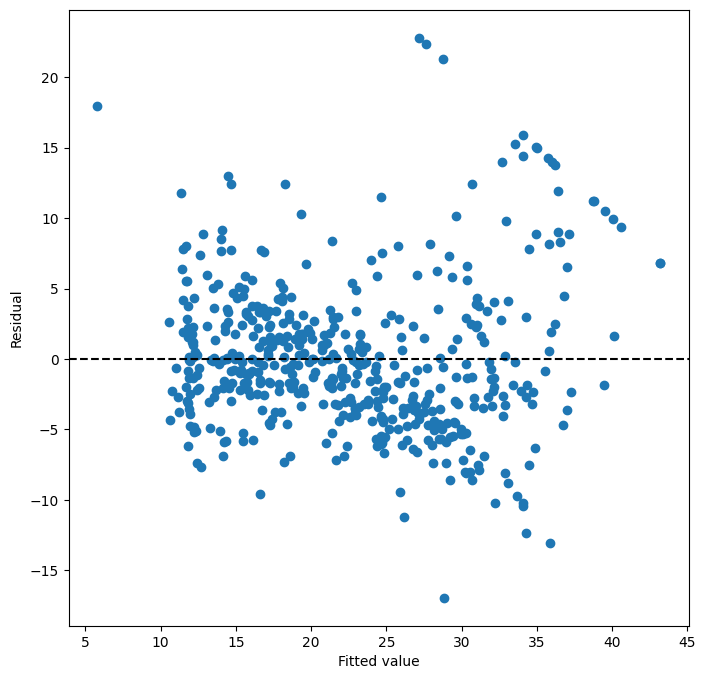

In [82]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

We can see that with the quadratic term in the model, there is less discernable pattern in the model (and hence less heteroskedacity, which is good!).

### 3.6.7 Qualitative Predictors

Here we use the `Carseats` data, which is included in the `ISLP` package and has some qualitative predictors.

In [83]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

For example, the predictors `ShelveLoc`, and indicator of the quality of the shelving location, is a qualitative predictor with 3 possible values: `Bad`, `Medium`, and `Good`. Given a qualitative variables, `ModelSpec()` generates a dummy variable using *one-hot encoding* of the categorical feature. The columns sum to one across a fixed observation, so to avoid colinearity with an intercept the first column (or option) is dropped.

Below we fit a multiple regression model that includes some interaction terms.

In [84]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In the above results, we can see that `ShelveLoc[Good]` has a significant $p$-value and a high coefficient, indicating that a good shelving location corresponds with better sales. Similarly, a positive coefficient on `ShelveLoc[Medium]` indicates that even a medium quality shelving location has a positive impact on sales.